#Predictive Maintenance on Hydraulic Systems

The objective of this project is to predict if a petroleum-based Hydraulic System will fail in a time window given or will not fail. The system has 5 components but in this work we just examined three of them (cooler, pump and flag). Essensiatilly, this is a predictive maintenance problem framed as a multi-class classification task. Therefore, we used a Deep Learning approach for handle the situation.

As a methodology, we use Artificial Neural Networks (ANN). Specifically, we use Convolutional Neural Networks (CNN) for predicting this part. Since these are three targets (condition monitoring of the pump, condition monitoring of the cooler, condition monitoring of the flag), we utilize the same Neural Network architecture and finally trained three different models.

The rate of implementation of predictive maintenance in manufacturing plants is increasing extremely worldwide. Recently companies seem to understand that Machine Learning systems could give better maintenance schedules that simples fixed rules. This fact could lead to relevant reductions in operational costs, so the impact in the business is rather evident. 

###Content:
###1. Defining the functions
###2. Condition monitoring of the pump
###3. Condition monitoring of the cooler
###4. Condition monitoring of the flag

In [0]:
#Libraries

#Data wrangling
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt

#SkLearn core and algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#Upgrading Keras
pip install -U keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [3]:
#Keras models 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.utils import model_to_dot

Using TensorFlow backend.


In [0]:
#Displaying images in the notebook 
from IPython.display import Image 

In [0]:
#Importing the target of the dataset
url_target = "https://raw.githubusercontent.com/Dedox-tech/Dataset/master/profile.txt"

In [0]:
#Reading the dataset
target = pd.read_csv(url_target, sep="\t", header=None, names=["Cooler","Valve","Pump","Accumulator","Flag"])

In [7]:
#Showing the first 5 rows of the dataset
target.head()

,Cooler,Valve,Pump,Accumulator,Flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


In [8]:
#Showing info about the dataset
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Cooler       2205 non-null   int64
 1   Valve        2205 non-null   int64
 2   Pump         2205 non-null   int64
 3   Accumulator  2205 non-null   int64
 4   Flag         2205 non-null   int64
dtypes: int64(5)
memory usage: 86.3 KB


#1. Defining the functions

#1.1 Functions for preprocessing

In [0]:
#Defining the preprocessing steps

def do_preprocessing (X, y, features, timesteps):

  X_numpy_reshaped = X.sort_index().values.reshape(-1,features,timesteps).transpose(0,2,1)

  X_train, X_test, y_train, y_test = train_test_split(X_numpy_reshaped, y, random_state = 0, test_size=0.20)

  scaler = StandardScaler()

  X_train_processed = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
  X_test_processed = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

  label_encoder = LabelEncoder()

  y_train_encoded = label_encoder.fit_transform(y_train)
  y_test_encoded = label_encoder.fit_transform(y_test)

  y_train_processed = to_categorical(y_train_encoded)
  y_test_processed = to_categorical(y_test_encoded)

  return X_train_processed, X_test_processed, y_train_processed, y_test_processed

#1.2 Functions associated with the models

In [0]:
#Defining the neural network model

def neural_network (input_shape, class_numbers):

  conv_net = Sequential()
  conv_net.add(Conv1D(100, 6, activation="relu", input_shape = input_shape))
  conv_net.add(Conv1D(100, 6, activation="relu"))
  conv_net.add(MaxPooling1D(3))
  conv_net.add(Conv1D(160, 6, activation="relu"))
  conv_net.add(Conv1D(160, 6, activation="relu"))
  conv_net.add(GlobalAveragePooling1D())
  conv_net.add(Dropout(0.5))
  conv_net.add(Dense(class_numbers, activation="softmax"))

  return conv_net

In [0]:
#Plot the neural network architecture

def plot_neural_network (conv_net, name):

  plot_model(conv_net, to_file=name, expand_nested=False, rankdir="TB", show_shapes=True) 

  return Image(name)

In [0]:
#Compile and Fitting the neural network
#Note that the output of the function is a tuple which contains the values of loss and accuracy

def processing_neural_network (conv_net, X_train, y_train):

  conv_net.compile(loss= "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  
  history = conv_net.fit(x = X_train, y = y_train, epochs = 10, validation_split = 0.2)

  loss_test = history.history["val_loss"]
  loss_train = history.history["loss"]

  accuracy_test = history.history["val_accuracy"]
  accuracy_train = history.history["accuracy"]

  return loss_test, loss_train, accuracy_test, accuracy_train

#1.3 Complementary functions 

In [0]:
#Getting Epochs

def get_epochs (epochs_number):

  epochs = []

  while epochs_number > 0:

    epochs.append(epochs_number)
    epochs_number = epochs_number - 1

  epochs.reverse()

  return epochs

In [0]:
#Defining the way of plot loss curve

def plot_loss_curve (loss, epochs, color, title):

  data_loss = {"Loss": loss , "Epochs": epochs}
  plot_loss = pd.DataFrame (data = data_loss)

  return plot_loss.plot(x = "Epochs", y = "Loss", color = color, title = title, figsize = (5,5))

In [0]:
#Defining the way of plot accuracy curve

def plot_accuracy_curve (accuracy, epochs, color, title):

  data_accuracy = {"Accuracy": accuracy, "Epochs": epochs}
  plot_accuracy = pd.DataFrame (data = data_accuracy)

  return plot_accuracy.plot(x = "Epochs", y = "Accuracy", color = color, title = title, figsize = (5,5))

#2. Condition Monitoring of the Pump

#2.1 Data exploration and preprocessing

In [0]:
#Defining the first target of the dataset
y_pump = target["Pump"]

In [17]:
#Showing the first five rows of the first target
y_pump.head()

0    0
1    0
2    0
3    0
4    0
Name: Pump, dtype: int64

In [18]:
#Counting the number of classes
y_pump.value_counts()

0    1221
1     492
2     492
Name: Pump, dtype: int64

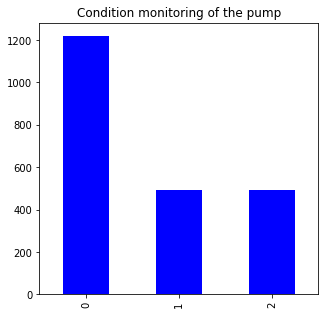

In [19]:
#Plotting the class distribution of the first target
y_pump.value_counts().plot(kind = "bar", color = "blue", title = "Condition monitoring of the pump", figsize = (5,5))

In [20]:
#Legends
print("Legend: ")
print("0: no leakage")
print("1: weak leakage")
print("2: severe leakage")

Legend: 
0: no leakage
1: weak leakage
2: severe leakage


In [0]:
#Importing the features associated with the first target
url_FS1 = "https://raw.githubusercontent.com/Dedox-tech/Dataset/master/FS1.txt"

In [0]:
#Reading the first feature
FS1 = pd.read_csv(url_FS1, sep="\t", header=None)

In [23]:
#Showing the first 5 rows of the first feature
FS1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599
0,8.990,0.770,0.641,0.006,0.000,0.000,0.001,0.003,0.001,0.001,0.001,0.005,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.005,0.003,0.000,0.001,0.001,0.003,0.001,0.003,0.003,0.003,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.003,0.003,0.0,...,7.904,7.703,7.917,7.902,7.846,7.881,7.737,8.046,7.775,7.730,8.006,7.864,7.859,7.911,7.739,8.004,7.857,7.684,7.971,7.829,7.907,7.885,7.680,7.980,7.890,7.744,7.927,7.795,7.908,7.919,7.743,7.992,7.919,7.773,7.955,7.823,7.963,7.876,7.738,8.036
1,8.919,0.815,0.709,0.009,0.004,0.000,0.001,0.000,0.000,0.001,0.008,0.000,0.001,0.003,0.004,0.000,0.001,0.004,0.003,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.001,0.003,0.000,0.000,0.000,0.001,0.001,0.001,0.003,0.001,0.003,0.008,0.0,...,7.933,7.791,7.915,7.928,7.802,7.975,7.776,8.029,7.946,7.875,7.913,7.723,8.009,7.869,7.980,7.939,7.758,7.908,7.772,7.999,7.926,7.862,7.899,7.724,7.946,7.860,7.986,7.888,7.714,7.965,7.831,8.003,7.923,7.745,7.867,7.747,7.969,7.969,7.963,7.890
2,9.179,0.683,0.528,0.008,0.003,0.001,0.003,0.003,0.004,0.006,0.000,0.001,0.001,0.003,0.001,0.001,0.001,0.004,0.004,0.003,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.003,0.001,0.000,0.000,0.004,0.001,0.003,0.001,0.000,0.003,0.001,0.000,0.0,...,8.000,7.768,8.058,7.918,7.751,7.902,7.781,7.910,7.759,7.999,7.854,7.959,7.867,7.873,7.857,7.777,7.959,7.778,8.051,7.907,7.994,7.892,7.796,7.888,7.678,7.861,7.835,8.016,7.878,7.994,7.862,7.815,7.894,7.743,7.936,7.770,7.982,7.873,7.898,7.952
3,9.034,0.728,0.595,0.009,0.001,0.004,0.003,0.003,0.003,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.003,0.001,0.003,0.003,0.001,0.001,0.006,0.000,0.004,0.001,0.001,0.006,0.000,0.001,0.003,0.005,0.000,0.000,0.0,...,7.831,7.943,7.778,7.869,7.762,7.956,7.772,7.966,7.758,7.934,7.936,7.976,7.890,7.909,7.826,7.718,7.917,7.817,7.927,7.791,7.862,7.848,7.990,7.834,7.953,7.941,7.882,7.835,7.779,7.938,7.631,7.949,7.773,8.054,7.827,8.011,7.919,7.938,7.877,7.773
4,8.729,0.705,0.446,0.014,0.007,0.003,0.001,0.003,0.001,0.000,0.001,0.001,0.000,0.001,0.005,0.000,0.000,0.000,0.001,0.000,0.001,0.003,0.005,0.001,0.001,0.000,0.001,0.001,0.003,0.001,0.000,0.003,0.003,0.001,0.001,0.001,0.000,0.000,0.000,0.0,...,7.808,7.706,7.976,7.688,7.909,7.816,7.777,7.748,7.992,7.786,7.875,7.779,7.951,7.819,8.072,7.806,7.929,7.873,7.875,7.887,7.844,7.884,7.756,7.902,7.673,7.921,7.731,8.001,7.702,8.022,7.771,7.936,7.919,7.946,7.804,7.983,7.838,7.882,7.894,7.825


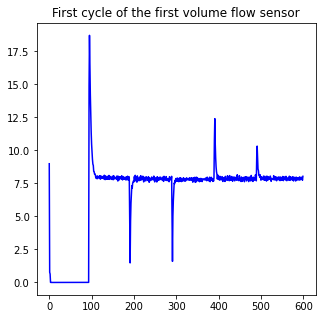

In [24]:
#Ploting the first cycle of the first sensor
FS1.iloc[0].plot(kind = "line", color = "blue", title = "First cycle of the first volume flow sensor", figsize = (5,5))

In [25]:
#Showing info about the first sensor
FS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Columns: 600 entries, 0 to 599
dtypes: float64(600)
memory usage: 10.1 MB


In [0]:
#Importing the features associated with the first target
url_FS2 = "https://raw.githubusercontent.com/Dedox-tech/Dataset/master/FS2.txt"

In [0]:
#Reading the first feature
FS2 = pd.read_csv(url_FS2, sep="\t", header=None)

In [28]:
#Showing the first 5 rows of the second feature
FS2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599
0,10.179,10.174,10.151,10.149,10.172,10.176,10.169,10.176,10.174,10.171,10.176,10.187,10.172,10.165,10.159,10.170,10.159,10.176,10.171,10.169,10.163,10.148,10.163,10.164,10.174,10.162,10.151,10.187,10.156,10.173,10.167,10.174,10.171,10.173,10.174,10.186,10.187,10.182,10.160,10.177,...,10.401,10.392,10.389,10.374,10.396,10.411,10.415,10.428,10.422,10.416,10.394,10.404,10.405,10.415,10.387,10.373,10.352,10.385,10.405,10.408,10.391,10.384,10.414,10.414,10.426,10.414,10.410,10.409,10.408,10.422,10.413,10.399,10.397,10.384,10.401,10.407,10.395,10.374,10.379,10.373
1,10.408,10.429,10.415,10.418,10.401,10.403,10.408,10.416,10.398,10.417,10.410,10.392,10.414,10.427,10.416,10.403,10.388,10.409,10.405,10.383,10.389,10.403,10.397,10.423,10.419,10.403,10.389,10.377,10.392,10.397,10.405,10.394,10.370,10.392,10.388,10.394,10.386,10.388,10.399,10.376,...,10.364,10.384,10.408,10.404,10.422,10.399,10.401,10.439,10.406,10.387,10.403,10.401,10.423,10.421,10.418,10.411,10.389,10.397,10.408,10.401,10.386,10.399,10.392,10.401,10.439,10.414,10.415,10.387,10.368,10.383,10.438,10.411,10.419,10.414,10.407,10.391,10.427,10.411,10.434,10.391
2,10.392,10.386,10.404,10.391,10.387,10.422,10.414,10.414,10.441,10.434,10.415,10.403,10.421,10.416,10.443,10.388,10.418,10.394,10.387,10.404,10.381,10.374,10.369,10.396,10.411,10.413,10.372,10.376,10.373,10.387,10.416,10.381,10.366,10.385,10.392,10.431,10.401,10.382,10.387,10.392,...,10.346,10.346,10.337,10.347,10.334,10.352,10.328,10.323,10.333,10.333,10.336,10.341,10.318,10.340,10.337,10.336,10.347,10.363,10.336,10.347,10.356,10.325,10.373,10.351,10.327,10.376,10.363,10.334,10.326,10.323,10.320,10.352,10.356,10.336,10.338,10.327,10.337,10.350,10.356,10.356
3,10.329,10.328,10.349,10.363,10.359,10.328,10.333,10.341,10.371,10.329,10.336,10.320,10.332,10.376,10.350,10.356,10.321,10.339,10.336,10.340,10.376,10.352,10.326,10.344,10.327,10.336,10.348,10.348,10.345,10.350,10.346,10.356,10.354,10.344,10.334,10.323,10.352,10.348,10.331,10.367,...,10.281,10.284,10.292,10.283,10.257,10.267,10.274,10.292,10.294,10.291,10.265,10.263,10.292,10.286,10.283,10.290,10.286,10.271,10.292,10.280,10.274,10.270,10.288,10.262,10.296,10.292,10.281,10.266,10.288,10.279,10.299,10.296,10.283,10.256,10.270,10.272,10.280,10.285,10.267,10.261
4,10.276,10.279,10.292,10.288,10.266,10.271,10.284,10.283,10.294,10.267,10.254,10.267,10.284,10.283,10.301,10.291,10.270,10.294,10.284,10.298,10.292,10.281,10.263,10.283,10.287,10.307,10.296,10.273,10.274,10.271,10.292,10.286,10.276,10.281,10.272,10.299,10.298,10.300,10.279,10.283,...,10.211,10.213,10.181,10.205,10.196,10.200,10.193,10.227,10.198,10.211,10.199,10.203,10.179,10.199,10.211,10.206,10.217,10.224,10.209,10.207,10.214,10.216,10.223,10.209,10.236,10.203,10.206,10.227,10.221,10.213,10.199,10.199,10.233,10.245,10.233,10.211,10.205,10.214,10.227,10.216


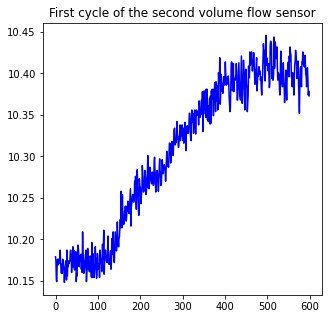

In [29]:
#Ploting the first cycle of the second sensor
FS2.iloc[0].plot(kind = "line", color = "blue", title = "First cycle of the second volume flow sensor", figsize = (5,5))

In [30]:
#Showing info about the second sensor
FS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Columns: 600 entries, 0 to 599
dtypes: float64(600)
memory usage: 10.1 MB


In [0]:
#Merge the features
X_pump = pd.concat([FS1,FS2])

In [32]:
#Showing the total features
X_pump.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599
0,8.990,0.770,0.641,0.006,0.000,0.000,0.001,0.003,0.001,0.001,0.001,0.005,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.005,0.003,0.000,0.001,0.001,0.003,0.001,0.003,0.003,0.003,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.003,0.003,0.0,...,7.904,7.703,7.917,7.902,7.846,7.881,7.737,8.046,7.775,7.730,8.006,7.864,7.859,7.911,7.739,8.004,7.857,7.684,7.971,7.829,7.907,7.885,7.680,7.980,7.890,7.744,7.927,7.795,7.908,7.919,7.743,7.992,7.919,7.773,7.955,7.823,7.963,7.876,7.738,8.036
1,8.919,0.815,0.709,0.009,0.004,0.000,0.001,0.000,0.000,0.001,0.008,0.000,0.001,0.003,0.004,0.000,0.001,0.004,0.003,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.001,0.003,0.000,0.000,0.000,0.001,0.001,0.001,0.003,0.001,0.003,0.008,0.0,...,7.933,7.791,7.915,7.928,7.802,7.975,7.776,8.029,7.946,7.875,7.913,7.723,8.009,7.869,7.980,7.939,7.758,7.908,7.772,7.999,7.926,7.862,7.899,7.724,7.946,7.860,7.986,7.888,7.714,7.965,7.831,8.003,7.923,7.745,7.867,7.747,7.969,7.969,7.963,7.890
2,9.179,0.683,0.528,0.008,0.003,0.001,0.003,0.003,0.004,0.006,0.000,0.001,0.001,0.003,0.001,0.001,0.001,0.004,0.004,0.003,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.003,0.001,0.000,0.000,0.004,0.001,0.003,0.001,0.000,0.003,0.001,0.000,0.0,...,8.000,7.768,8.058,7.918,7.751,7.902,7.781,7.910,7.759,7.999,7.854,7.959,7.867,7.873,7.857,7.777,7.959,7.778,8.051,7.907,7.994,7.892,7.796,7.888,7.678,7.861,7.835,8.016,7.878,7.994,7.862,7.815,7.894,7.743,7.936,7.770,7.982,7.873,7.898,7.952
3,9.034,0.728,0.595,0.009,0.001,0.004,0.003,0.003,0.003,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.003,0.001,0.003,0.003,0.001,0.001,0.006,0.000,0.004,0.001,0.001,0.006,0.000,0.001,0.003,0.005,0.000,0.000,0.0,...,7.831,7.943,7.778,7.869,7.762,7.956,7.772,7.966,7.758,7.934,7.936,7.976,7.890,7.909,7.826,7.718,7.917,7.817,7.927,7.791,7.862,7.848,7.990,7.834,7.953,7.941,7.882,7.835,7.779,7.938,7.631,7.949,7.773,8.054,7.827,8.011,7.919,7.938,7.877,7.773
4,8.729,0.705,0.446,0.014,0.007,0.003,0.001,0.003,0.001,0.000,0.001,0.001,0.000,0.001,0.005,0.000,0.000,0.000,0.001,0.000,0.001,0.003,0.005,0.001,0.001,0.000,0.001,0.001,0.003,0.001,0.000,0.003,0.003,0.001,0.001,0.001,0.000,0.000,0.000,0.0,...,7.808,7.706,7.976,7.688,7.909,7.816,7.777,7.748,7.992,7.786,7.875,7.779,7.951,7.819,8.072,7.806,7.929,7.873,7.875,7.887,7.844,7.884,7.756,7.902,7.673,7.921,7.731,8.001,7.702,8.022,7.771,7.936,7.919,7.946,7.804,7.983,7.838,7.882,7.894,7.825


In [33]:
#Showing info about the total features
X_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 2204
Columns: 600 entries, 0 to 599
dtypes: float64(600)
memory usage: 20.2 MB


In [0]:
#Doing the preprocessing steps
X_train_processed_pump, X_test_processed_pump, y_train_processed_pump, y_test_processed_pump = do_preprocessing(X = X_pump, y = y_pump, features = 2, timesteps= 600)

#2.2 Modeling: Convolutional Neural Networks (CNN)

In [0]:
#Calling a CNN
model_pump = neural_network(input_shape = (600,2), class_numbers = (3))

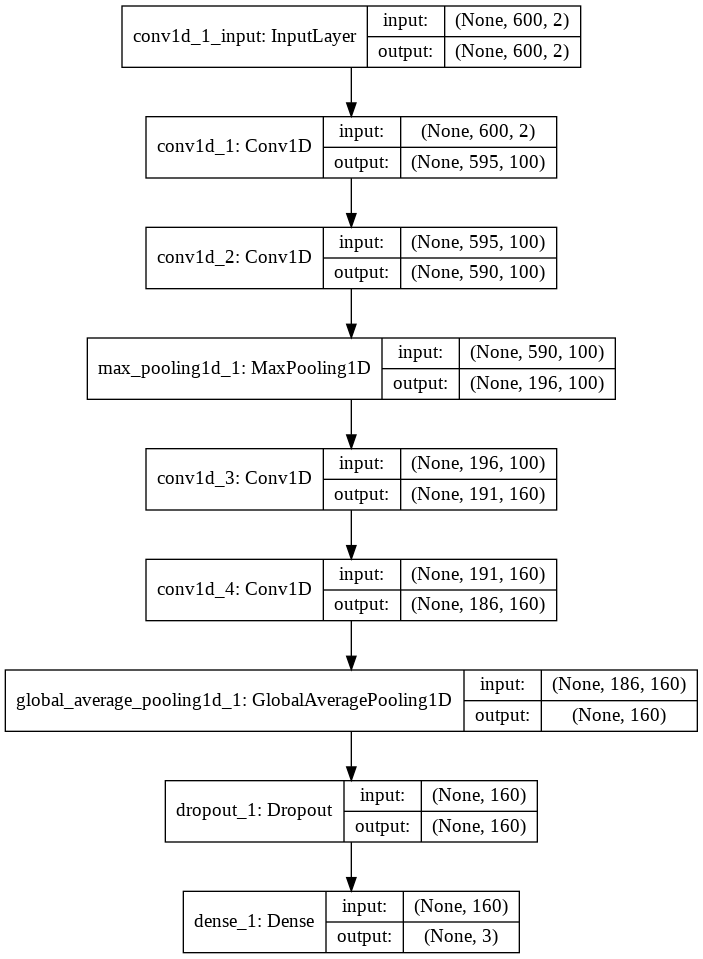

In [36]:
#Plotting the CNN architecture
plot_neural_network(conv_net = model_pump, name="model_pump.png")

In [37]:
#Processing the CNN
loss_test_pump, loss_train_pump, accuracy_test_pump, accuracy_train_pump = processing_neural_network(conv_net = model_pump, X_train = X_train_processed_pump, y_train = y_train_processed_pump)

Train on 1411 samples, validate on 353 samples
Epoch 1/10
1411/1411 [==============================] - 7s 5ms/step - loss: 0.8639 - accuracy: 0.6130 - val_loss: 0.5366 - val_accuracy: 0.7875
Epoch 2/10
1411/1411 [==============================] - 0s 309us/step - loss: 0.4297 - accuracy: 0.7895 - val_loss: 0.3500 - val_accuracy: 0.8045
Epoch 3/10
1411/1411 [==============================] - 0s 302us/step - loss: 0.3166 - accuracy: 0.8575 - val_loss: 0.9156 - val_accuracy: 0.7025
Epoch 4/10
1411/1411 [==============================] - 0s 311us/step - loss: 0.3660 - accuracy: 0.8108 - val_loss: 0.2762 - val_accuracy: 0.9008
Epoch 5/10
1411/1411 [==============================] - 0s 302us/step - loss: 0.2120 - accuracy: 0.9235 - val_loss: 1.7993 - val_accuracy: 0.6346
Epoch 6/10
1411/1411 [==============================] - 0s 308us/step - loss: 0.3143 - accuracy: 0.8738 - val_loss: 0.1458 - val_accuracy: 0.9490
Epoch 7/10
1411/1411 [==============================] - 0s 304us/step - loss: 0

In [38]:
#Showing the parameters computed
model_pump.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 595, 100)          1300      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 590, 100)          60100     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 196, 100)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 191, 160)          96160     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 186, 160)          153760    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 160)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 160)              

#2.3 Results

In [39]:
#Get the accuracy scores
score_pump = model_pump.evaluate(X_test_processed_pump, y_test_processed_pump)
print("\n")
print("The scores are: ")
print(score_pump)
print("\n")

#Get the names of the metrics
names_pump = model_pump.metrics_names
print("The name of the previous scores are: ")
print(names_pump)
print("\n")

#Get the predictions
predictions_pump = model_pump.predict_classes(X_test_processed_pump)
print("The predictions of the model are: ")
print(predictions_pump)

441/441 [==============================] - 0s 159us/step


The scores are: 
[0.08494555654506834, 0.9659863710403442]


The name of the previous scores are: 
['loss', 'accuracy']


The predictions of the model are: 
[1 0 0 0 0 0 0 1 1 0 0 2 2 0 0 2 1 0 2 1 0 2 0 0 0 0 0 0 1 0 0 2 0 0 0 1 2
 2 2 2 0 0 0 0 1 0 1 0 1 0 0 0 2 0 1 0 2 1 2 0 0 0 2 2 2 2 0 0 0 2 1 0 0 0
 2 0 1 2 0 0 0 1 0 0 2 2 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 2 2 1 0
 0 1 2 1 0 2 0 2 0 2 0 0 0 0 1 2 1 2 0 2 2 2 0 0 1 1 2 0 2 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 0 0 0 2 0 1 2 2 2 0 1 0 0 0 1 1 0 0 1 0 2 0 0 0 2 1 0 2 1 0 0
 0 0 2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 1 0 2 2 1 0 0 2 1 1 2 0 2 1
 0 1 0 0 1 0 0 2 0 0 0 0 0 0 0 0 2 0 1 2 0 0 0 2 1 0 1 1 0 1 2 0 2 1 1 0 2
 2 0 0 0 1 1 0 0 0 2 2 1 2 0 0 0 0 2 0 0 0 2 2 2 1 0 2 2 0 2 0 1 2 2 0 0 0
 0 0 2 0 0 0 0 0 0 0 2 1 0 0 0 1 0 2 0 2 0 2 2 0 0 1 2 0 0 0 0 2 0 0 0 0 0
 1 0 0 0 1 1 1 1 2 0 2 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 2 2 1 0 0 0 0 2
 0 1 1 1 2 1 0 0 0 0 2 1 0 0 0 0 0

In [40]:
#Get the shape
print("The shape of the target pump is: ", y_test_processed_pump.shape)
print("The shape of the predictions given for the model is: ", predictions_pump.shape)

The shape of the target pump is:  (441, 3)
The shape of the predictions given for the model is:  (441,)


In [0]:
#Preprocessing trick with numpy
y_test_processed_pump_back = y_test_processed_pump.argmax(axis=-1)

In [42]:
#Showing the classification report
classification_pump = classification_report(y_test_processed_pump_back, predictions_pump)
print(classification_pump)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       0.98      0.87      0.92       101
           2       0.87      0.99      0.93        88

    accuracy                           0.97       441
   macro avg       0.95      0.95      0.95       441
weighted avg       0.97      0.97      0.97       441



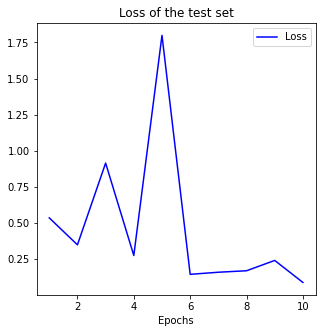

In [43]:
#Plotting the loss curve of the test set
plot_loss_curve(loss = loss_test_pump, epochs = get_epochs(10), color = "blue", title = "Loss of the test set")

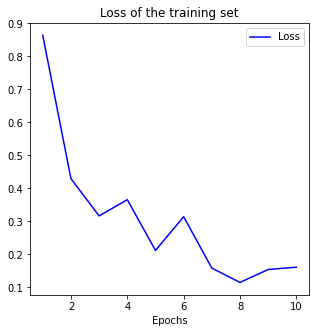

In [44]:
#Plotting the loss curve of the training set
plot_loss_curve(loss = loss_train_pump, epochs = get_epochs(10), color = "blue", title = "Loss of the training set")

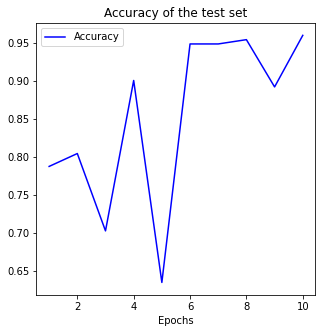

In [45]:
#Plotting the accuracy curve of the test set
plot_accuracy_curve (accuracy = accuracy_test_pump, epochs = get_epochs(10), color = "blue", title = "Accuracy of the test set")

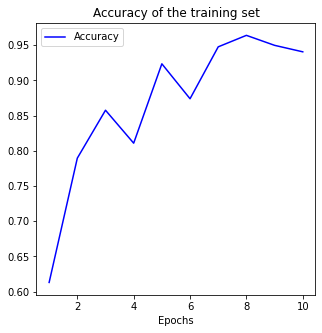

In [46]:
#Plotting the accuracy curve of the training set
plot_accuracy_curve (accuracy = accuracy_train_pump, epochs = get_epochs(10), color = "blue", title = "Accuracy of the training set")

#3. Condition Monitoring of the Cooler

#3.1 Data exploration and preprocessing

In [0]:
#Defining the second target of the dataset
y_cooler = target["Cooler"]

In [48]:
#Exploring the second target
y_cooler.head()

0    3
1    3
2    3
3    3
4    3
Name: Cooler, dtype: int64

In [49]:
#Showing the distribution of the values
y_cooler.value_counts()

100    741
3      732
20     732
Name: Cooler, dtype: int64

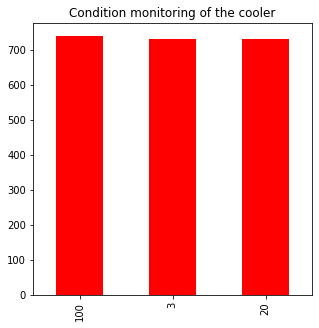

In [50]:
#Plotting the second target
y_cooler.value_counts().plot(kind = "bar", color = "red", title = "Condition monitoring of the cooler", figsize = (5,5))

In [51]:
#Legend
print("Legend: ")
print("100: full efficiency ")
print("3: close to total failure ")
print("20: reduced effifiency ")

Legend: 
100: full efficiency 
3: close to total failure 
20: reduced effifiency 


In [0]:
#Importing the features associated with the second target
url_TS1 = "https://raw.githubusercontent.com/Dedox-tech/Dataset/master/TS1.txt"

In [0]:
#Reading the first feature
TS1 = pd.read_csv(url_TS1, sep="\t", header=None)

In [54]:
#Showing the first feature
TS1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,35.570,35.492,35.469,35.422,35.414,35.320,35.227,35.242,35.160,35.176,35.172,35.168,35.156,35.187,35.176,35.250,35.234,35.316,35.316,35.402,35.402,35.398,35.441,35.414,35.434,35.480,35.500,35.488,35.559,35.555,35.574,35.652,35.668,35.664,35.660,35.734,35.824,35.824,35.820,35.836,35.836,35.828,35.840,35.859,35.918,35.914,35.895,35.992,35.980,35.980,36.008,35.984,35.996,36.039,36.008,36.008,36.094,36.102,36.090,36.152
1,36.156,36.094,35.992,36.008,35.992,35.902,35.824,35.820,35.727,35.727,35.648,35.734,35.828,35.848,35.902,36.035,36.078,36.199,36.246,36.301,36.398,36.473,36.500,36.555,36.652,36.645,36.664,36.652,36.738,36.715,36.797,36.797,36.891,36.902,36.898,36.984,36.984,37.062,37.051,37.145,37.141,37.172,37.164,37.164,37.152,37.238,37.234,37.305,37.305,37.324,37.328,37.324,37.340,37.332,37.316,37.410,37.418,37.422,37.488,37.477
2,37.488,37.391,37.340,37.312,37.223,37.145,37.059,36.973,36.898,36.879,36.887,36.887,36.980,37.059,37.137,37.230,37.316,37.398,37.477,37.582,37.578,37.723,37.730,37.730,37.797,37.898,37.980,37.977,37.984,38.016,38.031,38.047,38.117,38.125,38.195,38.219,38.207,38.289,38.301,38.281,38.367,38.379,38.379,38.379,38.379,38.375,38.367,38.391,38.391,38.469,38.457,38.461,38.457,38.469,38.469,38.555,38.527,38.543,38.527,38.621
3,38.633,38.535,38.469,38.379,38.297,38.223,38.125,38.062,37.977,37.969,37.887,37.902,37.965,38.047,38.180,38.203,38.367,38.406,38.457,38.629,38.633,38.699,38.801,38.801,38.828,38.902,38.895,38.969,38.988,39.055,39.055,39.055,39.055,39.121,39.215,39.215,39.219,39.227,39.273,39.285,39.293,39.293,39.273,39.285,39.375,39.359,39.375,39.379,39.367,39.363,39.441,39.363,39.367,39.457,39.461,39.461,39.473,39.441,39.453,39.461
4,39.461,39.461,39.375,39.281,39.203,39.113,39.043,38.969,38.875,38.883,38.809,38.789,38.883,38.965,39.047,39.121,39.234,39.281,39.453,39.461,39.488,39.633,39.723,39.719,39.711,39.801,39.879,39.867,39.883,39.973,39.973,39.961,40.047,40.133,40.047,40.133,40.145,40.230,40.219,40.219,40.305,40.297,40.285,40.309,40.281,40.309,40.391,40.348,40.320,40.336,40.324,40.320,40.312,40.340,40.320,40.387,40.391,40.391,40.387,40.391


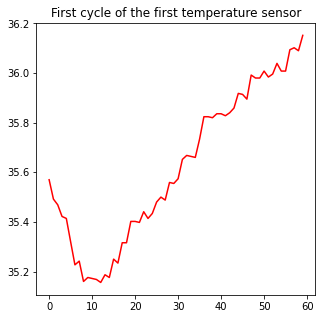

In [55]:
#Plotting the first feature (first cycle)
TS1.iloc[0].plot(kind = "line", color = "red", title = "First cycle of the first temperature sensor", figsize = (5,5))

In [0]:
#Importing the features associated with the second target
url_TS2 = "https://raw.githubusercontent.com/Dedox-tech/Dataset/master/TS2.txt" 

In [0]:
#Reading the second feature
TS2 = pd.read_csv(url_TS2, sep="\t", header=None)

In [58]:
#Showing the second feature
TS2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,40.961,40.949,40.965,40.922,40.879,40.879,40.828,40.812,40.809,40.785,40.789,40.785,40.773,40.789,40.785,40.773,40.812,40.785,40.801,40.809,40.797,40.785,40.828,40.863,40.867,40.879,40.809,40.895,40.926,40.949,40.965,40.961,40.984,41.020,41.039,41.043,41.043,41.043,41.043,41.059,41.098,41.109,41.121,41.129,41.125,41.121,41.129,41.148,41.141,41.180,41.211,41.129,41.195,41.211,41.207,41.191,41.207,41.207,41.129,41.250
1,41.258,41.277,41.262,41.223,41.211,41.176,41.129,41.129,41.070,41.031,41.039,41.031,41.066,41.113,41.113,41.184,41.207,41.223,41.262,41.223,41.277,41.285,41.285,41.297,41.355,41.379,41.437,41.465,41.465,41.516,41.520,41.527,41.531,41.574,41.613,41.625,41.680,41.719,41.766,41.777,41.805,41.781,41.867,41.789,41.867,41.871,41.871,41.883,41.926,41.922,41.949,41.941,41.980,41.957,41.980,42.020,42.023,42.031,42.078,42.105
2,42.129,42.105,42.117,42.066,42.031,41.969,41.926,41.867,41.867,41.855,41.871,41.832,41.867,41.941,41.984,41.949,42.105,42.113,42.117,42.129,42.141,42.207,42.242,42.277,42.309,42.363,42.371,42.371,42.348,42.402,42.445,42.457,42.539,42.500,42.594,42.633,42.617,42.633,42.676,42.703,42.766,42.777,42.777,42.820,42.875,42.852,42.875,42.867,42.875,42.875,42.887,42.887,42.906,42.941,42.930,42.934,42.973,42.988,43.039,43.035
3,43.039,43.043,43.039,43.000,42.957,42.887,42.879,42.879,42.875,42.809,42.805,42.852,42.867,42.867,42.934,42.961,43.027,43.027,43.125,43.121,43.121,43.121,43.176,43.207,43.246,43.281,43.293,43.352,43.363,43.363,43.367,43.391,43.422,43.457,43.527,43.551,43.605,43.609,43.641,43.703,43.723,43.777,43.785,43.797,43.828,43.840,43.879,43.867,43.871,43.863,43.879,43.879,43.891,43.883,43.895,43.961,43.934,43.949,43.961,43.988
4,44.031,44.027,43.988,43.961,43.895,43.879,43.895,43.836,43.805,43.742,43.746,43.789,43.812,43.801,43.895,43.895,43.961,44.016,44.047,44.090,44.113,44.137,44.109,44.125,44.180,44.125,44.238,44.289,44.301,44.312,44.371,44.371,44.359,44.410,44.441,44.477,44.535,44.551,44.617,44.617,44.629,44.629,44.641,44.652,44.656,44.695,44.707,44.707,44.723,44.777,44.766,44.801,44.805,44.789,44.859,44.848,44.863,44.871,44.887,44.871


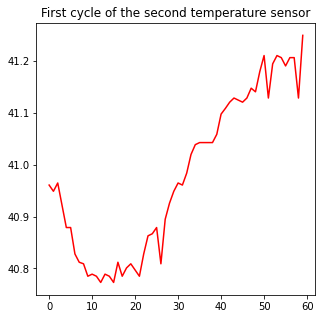

In [59]:
#Plotting the second feature (first cycle)
TS2.iloc[0].plot(kind = "line", color = "red", title = "First cycle of the second temperature sensor", figsize = (5,5))

In [0]:
#Importing the features associated with the second target
url_TS3 = "https://raw.githubusercontent.com/Dedox-tech/Dataset/master/TS3.txt"

In [0]:
#Reading the third feature
TS3 = pd.read_csv(url_TS3, sep="\t", header=None)

In [62]:
#Showing the third feature
TS3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,38.320,38.332,38.320,38.324,38.332,38.324,38.348,38.332,38.336,38.316,38.336,38.336,38.359,38.336,38.410,38.418,38.500,38.492,38.496,38.551,38.559,38.547,38.535,38.535,38.500,38.492,38.500,38.500,38.492,38.496,38.496,38.496,38.508,38.496,38.492,38.500,38.496,38.520,38.496,38.500,38.484,38.496,38.484,38.484,38.492,38.508,38.492,38.508,38.492,38.512,38.523,38.539,38.578,38.531,38.523,38.566,38.613,38.590,38.578,38.594
1,38.680,38.672,38.668,38.668,38.742,38.742,38.750,38.742,38.742,38.781,38.777,38.750,38.777,38.742,38.832,38.844,38.918,38.918,38.969,38.953,38.992,38.996,39.039,38.992,38.957,38.941,38.969,38.930,38.996,38.941,38.953,38.996,38.941,38.926,38.977,38.949,38.996,38.996,38.992,39.023,39.031,39.074,39.086,39.086,39.086,39.156,39.160,39.168,39.172,39.172,39.168,39.246,39.246,39.254,39.250,39.246,39.246,39.238,39.234,39.250
2,39.234,39.246,39.246,39.250,39.246,39.250,39.254,39.246,39.332,39.332,39.320,39.320,39.355,39.371,39.402,39.410,39.492,39.492,39.578,39.578,39.562,39.617,39.672,39.617,39.625,39.668,39.629,39.613,39.605,39.625,39.625,39.602,39.613,39.668,39.656,39.656,39.668,39.660,39.656,39.672,39.746,39.762,39.750,39.766,39.801,39.789,39.840,39.855,39.840,39.910,39.914,39.988,39.996,40.016,40.035,40.062,40.047,40.043,40.051,40.043
3,40.086,40.047,40.102,40.078,40.043,40.078,40.051,40.070,40.023,40.078,40.043,40.043,40.023,40.090,40.062,40.164,40.199,40.199,40.254,40.320,40.344,40.316,40.316,40.410,40.328,40.340,40.312,40.320,40.316,40.316,40.316,40.328,40.398,40.410,40.414,40.410,40.402,40.422,40.410,40.508,40.496,40.441,40.543,40.492,40.582,40.668,40.680,40.656,40.680,40.758,40.828,40.844,40.820,40.852,40.895,40.879,40.934,40.922,40.922,40.922
4,40.934,40.922,40.922,40.914,40.922,40.922,40.926,40.871,40.871,40.867,40.871,40.859,40.914,40.914,41.000,41.004,41.098,41.129,41.176,41.176,41.266,41.262,41.250,41.352,41.301,41.352,41.297,41.277,41.297,41.273,41.332,41.340,41.340,41.359,41.344,41.340,41.426,41.434,41.414,41.437,41.437,41.508,41.504,41.508,41.520,41.504,41.586,41.586,41.594,41.664,41.668,41.668,41.719,41.750,41.695,41.777,41.762,41.762,41.758,41.758


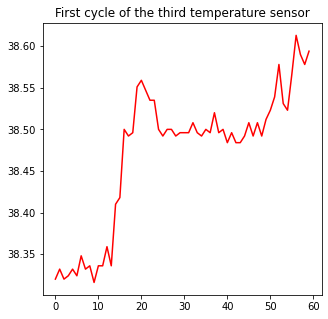

In [63]:
#Plotting the third feature (first cycle)
TS3.iloc[0].plot(kind = "line", color = "red", title = "First cycle of the third temperature sensor", figsize = (5,5))

In [0]:
#Importing the features associated with the second target
url_TS4 = "https://raw.githubusercontent.com/Dedox-tech/Dataset/master/TS4.txt"

In [0]:
#Reading the fourth feature
TS4 = pd.read_csv(url_TS4, sep="\t", header=None)

In [66]:
#Showing the fourth feature
TS4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,30.363,30.375,30.367,30.367,30.379,30.379,30.367,30.367,30.375,30.473,30.496,30.484,30.555,30.566,30.668,30.656,30.727,30.816,30.898,30.898,30.996,31.070,31.078,31.145,31.145,31.215,31.293,31.375,31.465,31.543,31.609,31.711,31.793,31.770,31.953,32.043,32.121,32.207,32.281,32.348,32.430,32.523,32.609,32.680,32.758,32.840,32.922,33.008,33.094,33.090,33.180,33.172,33.363,33.340,33.324,33.410,33.504,33.582,33.594,33.555
1,33.648,33.723,33.723,33.734,33.754,33.805,33.879,33.898,33.973,34.004,33.988,34.016,34.078,34.078,34.145,34.148,34.230,34.223,34.230,34.230,34.316,34.309,34.332,34.398,34.402,34.480,34.477,34.488,34.500,34.559,34.570,34.547,34.652,34.652,34.641,34.648,34.660,34.727,34.742,34.738,34.809,34.832,34.820,34.898,34.898,34.898,34.887,34.898,34.887,34.898,34.980,34.980,34.977,34.977,35.062,35.047,35.129,35.148,35.141,35.121
2,35.113,35.121,35.098,35.187,35.191,35.180,35.273,35.270,35.281,35.402,35.391,35.387,35.395,35.395,35.402,35.391,35.387,35.465,35.480,35.473,35.480,35.547,35.539,35.539,35.551,35.547,35.559,35.559,35.625,35.641,35.629,35.641,35.723,35.707,35.719,35.801,35.801,35.797,35.801,35.812,35.812,35.809,35.797,35.891,35.883,35.875,35.879,35.969,35.973,35.980,35.980,36.039,36.051,36.062,36.039,36.047,36.066,36.055,36.141,36.121
3,36.133,36.105,36.113,36.199,36.199,36.199,36.199,36.207,36.199,36.227,36.301,36.324,36.301,36.301,36.379,36.379,36.391,36.379,36.477,36.465,36.461,36.473,36.461,36.461,36.461,36.555,36.562,36.543,36.551,36.633,36.645,36.645,36.637,36.645,36.715,36.715,36.711,36.715,36.711,36.711,36.711,36.727,36.711,36.801,36.805,36.805,36.781,36.875,36.887,36.867,36.875,36.867,36.941,36.941,36.937,36.934,36.941,36.937,36.949,36.988
4,36.992,37.004,37.008,37.078,37.086,37.105,37.082,37.078,37.078,37.109,37.191,37.187,37.180,37.191,37.187,37.277,37.270,37.258,37.270,37.352,37.348,37.344,37.359,37.348,37.352,37.359,37.359,37.348,37.437,37.441,37.430,37.453,37.453,37.531,37.523,37.523,37.531,37.602,37.586,37.602,37.586,37.598,37.598,37.586,37.609,37.609,37.609,37.680,37.680,37.687,37.687,37.695,37.770,37.758,37.766,37.766,37.773,37.781,37.770,37.754


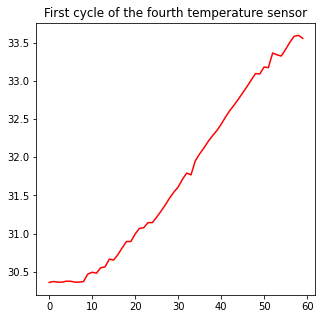

In [67]:
#Plotting the fourth feature(first cycle)
TS4.iloc[0].plot(kind = "line", color = "red", title = "First cycle of the fourth temperature sensor", figsize = (5,5))

In [0]:
#Merge the features
X_cooler = pd.concat([TS1,TS2,TS3,TS4])

In [69]:
#Showing the total features
X_cooler.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,35.570,35.492,35.469,35.422,35.414,35.320,35.227,35.242,35.160,35.176,35.172,35.168,35.156,35.187,35.176,35.250,35.234,35.316,35.316,35.402,35.402,35.398,35.441,35.414,35.434,35.480,35.500,35.488,35.559,35.555,35.574,35.652,35.668,35.664,35.660,35.734,35.824,35.824,35.820,35.836,35.836,35.828,35.840,35.859,35.918,35.914,35.895,35.992,35.980,35.980,36.008,35.984,35.996,36.039,36.008,36.008,36.094,36.102,36.090,36.152
1,36.156,36.094,35.992,36.008,35.992,35.902,35.824,35.820,35.727,35.727,35.648,35.734,35.828,35.848,35.902,36.035,36.078,36.199,36.246,36.301,36.398,36.473,36.500,36.555,36.652,36.645,36.664,36.652,36.738,36.715,36.797,36.797,36.891,36.902,36.898,36.984,36.984,37.062,37.051,37.145,37.141,37.172,37.164,37.164,37.152,37.238,37.234,37.305,37.305,37.324,37.328,37.324,37.340,37.332,37.316,37.410,37.418,37.422,37.488,37.477
2,37.488,37.391,37.340,37.312,37.223,37.145,37.059,36.973,36.898,36.879,36.887,36.887,36.980,37.059,37.137,37.230,37.316,37.398,37.477,37.582,37.578,37.723,37.730,37.730,37.797,37.898,37.980,37.977,37.984,38.016,38.031,38.047,38.117,38.125,38.195,38.219,38.207,38.289,38.301,38.281,38.367,38.379,38.379,38.379,38.379,38.375,38.367,38.391,38.391,38.469,38.457,38.461,38.457,38.469,38.469,38.555,38.527,38.543,38.527,38.621
3,38.633,38.535,38.469,38.379,38.297,38.223,38.125,38.062,37.977,37.969,37.887,37.902,37.965,38.047,38.180,38.203,38.367,38.406,38.457,38.629,38.633,38.699,38.801,38.801,38.828,38.902,38.895,38.969,38.988,39.055,39.055,39.055,39.055,39.121,39.215,39.215,39.219,39.227,39.273,39.285,39.293,39.293,39.273,39.285,39.375,39.359,39.375,39.379,39.367,39.363,39.441,39.363,39.367,39.457,39.461,39.461,39.473,39.441,39.453,39.461
4,39.461,39.461,39.375,39.281,39.203,39.113,39.043,38.969,38.875,38.883,38.809,38.789,38.883,38.965,39.047,39.121,39.234,39.281,39.453,39.461,39.488,39.633,39.723,39.719,39.711,39.801,39.879,39.867,39.883,39.973,39.973,39.961,40.047,40.133,40.047,40.133,40.145,40.230,40.219,40.219,40.305,40.297,40.285,40.309,40.281,40.309,40.391,40.348,40.320,40.336,40.324,40.320,40.312,40.340,40.320,40.387,40.391,40.391,40.387,40.391


In [70]:
#Showing info about the total features
X_cooler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8820 entries, 0 to 2204
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8820 non-null   float64
 1   1       8820 non-null   float64
 2   2       8820 non-null   float64
 3   3       8820 non-null   float64
 4   4       8820 non-null   float64
 5   5       8820 non-null   float64
 6   6       8820 non-null   float64
 7   7       8820 non-null   float64
 8   8       8820 non-null   float64
 9   9       8820 non-null   float64
 10  10      8820 non-null   float64
 11  11      8820 non-null   float64
 12  12      8820 non-null   float64
 13  13      8820 non-null   float64
 14  14      8820 non-null   float64
 15  15      8820 non-null   float64
 16  16      8820 non-null   float64
 17  17      8820 non-null   float64
 18  18      8820 non-null   float64
 19  19      8820 non-null   float64
 20  20      8820 non-null   float64
 21  21      8820 non-null   float64
 22  

In [0]:
#Doing the preprocessing steps
X_train_processed_cooler, X_test_processed_cooler, y_train_processed_cooler, y_test_processed_cooler = do_preprocessing(X = X_cooler, y = y_cooler, features = 4, timesteps= 60)

#3.2 Modeling: Convolutional Neural Networks (CNN)

In [0]:
#Calling the CNN
model_cooler = neural_network(input_shape = (60,4), class_numbers = (3))

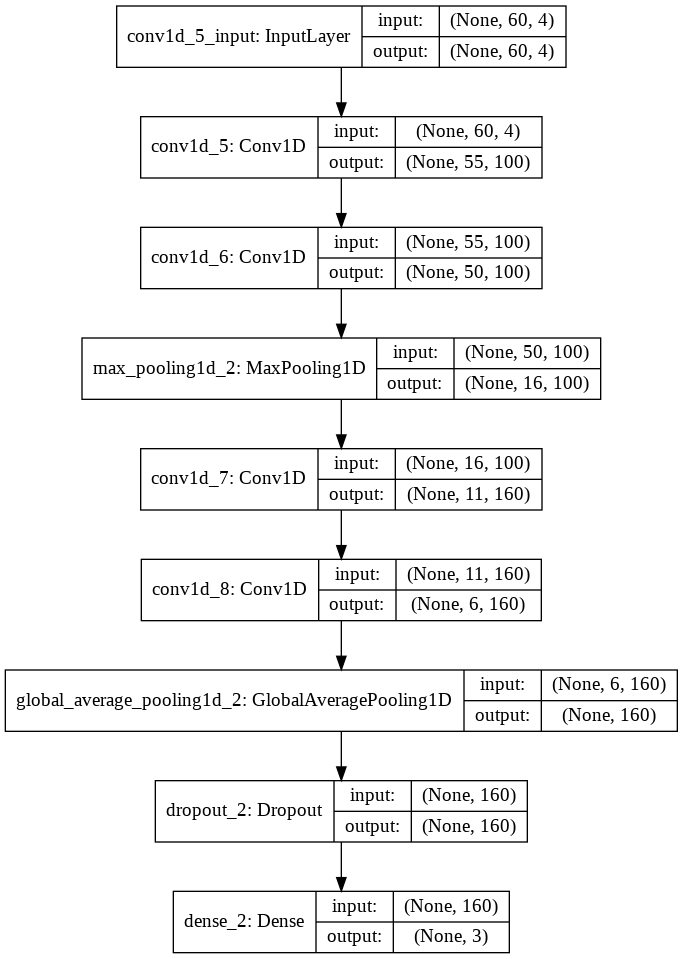

In [73]:
#Plotting the CNN
plot_neural_network(conv_net = model_cooler, name="model_cooler.png")

In [74]:
#Processing the CNN
loss_test_cooler, loss_train_cooler, accuracy_test_cooler, accuracy_train_cooler = processing_neural_network(conv_net = model_cooler, X_train = X_train_processed_cooler, y_train = y_train_processed_cooler)

Train on 1411 samples, validate on 353 samples
Epoch 1/10
1411/1411 [==============================] - 1s 419us/step - loss: 0.2282 - accuracy: 0.9291 - val_loss: 0.0772 - val_accuracy: 0.9858
Epoch 2/10
1411/1411 [==============================] - 0s 179us/step - loss: 0.1152 - accuracy: 0.9752 - val_loss: 0.0554 - val_accuracy: 0.9887
Epoch 3/10
1411/1411 [==============================] - 0s 190us/step - loss: 0.0802 - accuracy: 0.9816 - val_loss: 0.0485 - val_accuracy: 0.9887
Epoch 4/10
1411/1411 [==============================] - 0s 180us/step - loss: 0.0817 - accuracy: 0.9766 - val_loss: 0.1892 - val_accuracy: 0.9405
Epoch 5/10
1411/1411 [==============================] - 0s 175us/step - loss: 0.0926 - accuracy: 0.9773 - val_loss: 0.0618 - val_accuracy: 0.9858
Epoch 6/10
1411/1411 [==============================] - 0s 176us/step - loss: 0.0782 - accuracy: 0.9837 - val_loss: 0.0566 - val_accuracy: 0.9802
Epoch 7/10
1411/1411 [==============================] - 0s 172us/step - loss:

In [75]:
#Showing the parameters computed
model_cooler.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 55, 100)           2500      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 50, 100)           60100     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 16, 100)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 11, 160)           96160     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 160)            153760    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 160)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 160)              

#3.3 Results

In [76]:
#Get the accuracy scores
score_cooler = model_cooler.evaluate(X_test_processed_cooler, y_test_processed_cooler)
print("\n")
print("The scores are: ")
print(score_cooler)
print("\n")

#Get the name of the metrics
names_cooler = model_cooler.metrics_names
print("The name of the previous scores are: ")
print(names_cooler)
print("\n")

#Get the predictions
predictions_cooler = model_cooler.predict_classes(X_test_processed_cooler)
print("The predictions of the model are: ")
print(predictions_cooler)

441/441 [==============================] - 0s 120us/step


The scores are: 
[0.15269774720579588, 0.9682539701461792]


The name of the previous scores are: 
['loss', 'accuracy']


The predictions of the model are: 
[2 0 0 2 0 2 1 1 1 0 2 1 2 2 2 0 2 1 0 0 1 2 1 2 2 0 0 0 1 0 2 2 1 0 0 1 0
 1 0 0 2 2 0 2 2 2 1 0 2 0 2 2 1 0 0 2 1 1 0 0 2 0 2 1 0 1 0 2 0 1 0 0 0 0
 2 1 2 2 1 2 2 2 0 2 0 0 1 0 0 1 0 0 1 2 0 1 0 2 1 1 1 0 0 1 0 0 1 1 2 1 0
 0 0 2 0 1 0 1 1 0 1 1 2 2 0 2 1 1 0 2 2 1 0 2 2 2 2 1 2 0 0 2 1 2 0 1 1 1
 2 1 2 0 0 2 1 1 0 1 1 0 2 1 0 0 2 2 1 1 2 2 1 0 0 1 1 1 1 1 1 0 2 0 0 1 0
 1 1 2 2 2 1 2 1 0 2 0 2 0 1 0 0 1 2 0 0 1 1 2 0 0 1 2 1 0 0 0 1 1 0 1 0 1
 2 1 2 1 0 0 0 0 0 2 0 0 2 2 1 2 2 1 1 0 2 0 0 0 1 0 2 0 2 2 2 0 1 0 2 0 0
 0 1 0 2 0 1 0 1 2 0 2 2 2 0 1 2 2 1 2 0 0 0 0 2 1 1 2 1 2 2 2 1 0 1 0 1 1
 0 2 2 0 1 2 2 2 2 0 0 2 0 1 0 0 2 1 1 1 0 0 0 1 0 2 1 1 2 2 1 0 2 1 2 1 0
 1 2 0 0 1 1 2 2 0 2 1 1 2 0 2 2 0 1 2 0 2 1 2 1 2 2 2 0 2 1 1 1 1 0 0 0 0
 2 2 1 2 2 2 1 2 1 1 1 1 2 1 1 0 1

In [77]:
#Get the shape 
print("The shape of the target cooler is: ", y_test_processed_cooler.shape)
print("The shape of the predictions given for the model is: ", predictions_cooler.shape)

The shape of the target cooler is:  (441, 3)
The shape of the predictions given for the model is:  (441,)


In [0]:
#Preprocessing trick with numpy
y_test_processed_cooler_back = y_test_processed_cooler.argmax(axis=-1)

In [79]:
#Showing the classification report
classification_cooler = classification_report(y_test_processed_cooler_back, predictions_cooler)
print(classification_cooler)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       156
           1       0.96      0.97      0.96       145
           2       0.98      0.99      0.99       140

    accuracy                           0.97       441
   macro avg       0.97      0.97      0.97       441
weighted avg       0.97      0.97      0.97       441



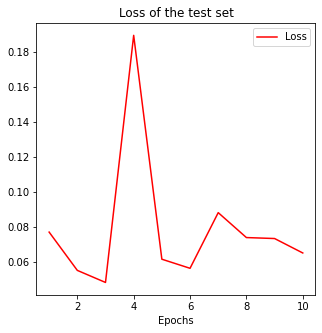

In [80]:
#Plotting the loss curve of the test set
plot_loss_curve(loss = loss_test_cooler, epochs = get_epochs(10), color = "red", title = "Loss of the test set")

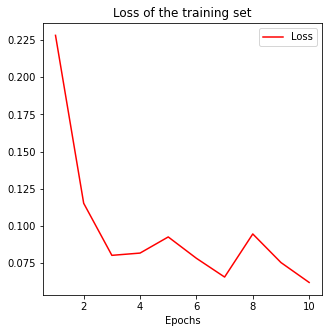

In [81]:
#Plotting the loss curve of the training set
plot_loss_curve(loss = loss_train_cooler, epochs = get_epochs(10), color = "red", title = "Loss of the training set")

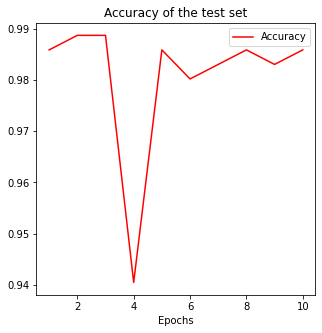

In [82]:
#Plotting the accuracy curve of the test set
plot_accuracy_curve (accuracy = accuracy_test_cooler, epochs = get_epochs(10), color = "red", title = "Accuracy of the test set")

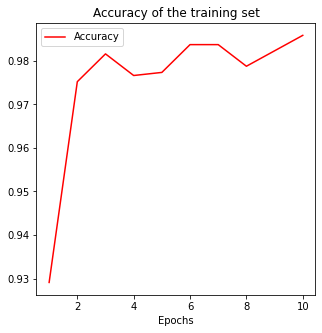

In [83]:
#Plotting the accuracy curve of the training set
plot_accuracy_curve (accuracy = accuracy_train_cooler, epochs = get_epochs(10), color = "red", title = "Accuracy of the training set")

#4. Condition Monitoring of the Flag

#4.1 Data exploration and preprocessing

In [0]:
#Defining the third target of the dataset
y_flag = target["Flag"]

In [85]:
#Showing the third target
y_flag.head()

0    1
1    1
2    1
3    1
4    1
Name: Flag, dtype: int64

In [86]:
#Showing the distribution of the values
y_flag.value_counts()

0    1449
1     756
Name: Flag, dtype: int64

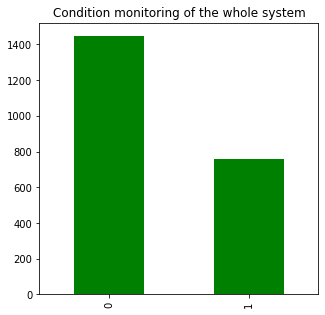

In [87]:
#Plotting the target
y_flag.value_counts().plot(kind = "bar", color = "green", title = "Condition monitoring of the whole system", figsize = (5,5))

In [88]:
#Legend
print("Legend: ")
print("0: Conditions were stable")
print("1: Static conditions might not have been reached yet")

Legend: 
0: Conditions were stable
1: Static conditions might not have been reached yet


In [0]:
#Importing the features associated with the third target
url_SE = "https://raw.githubusercontent.com/Dedox-tech/Dataset/master/SE.txt"

In [0]:
#Reading the first feature
SE = pd.read_csv(url_SE, sep="\t", header=None)

In [91]:
#Showing the first feature
SE.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,68.039,0,0,0,0,0,0,0,0,69.141,69.141,68.144,68.144,67.791,67.791,67.504,67.504,67.657,67.657,54.079,54.079,68.728,68.728,68.700,68.700,68.740,68.740,68.609,68.609,56.919,56.919,69.443,69.443,69.812,69.812,69.521,69.521,69.940,69.940,79.568,79.568,68.664,68.664,68.889,68.889,68.677,68.677,68.708,68.708,74.427,74.427,68.101,68.101,68.420,68.420,68.223,68.223,68.159,68.159,68.264
1,68.264,0,0,0,0,0,0,0,0,65.715,65.715,67.964,67.964,68.045,68.045,68.206,68.206,67.825,67.825,54.092,54.092,69.240,69.240,68.715,68.715,68.839,68.839,68.961,68.961,57.016,57.016,69.922,69.922,70.201,70.201,70.253,70.253,70.365,70.365,80.441,80.441,69.220,69.220,69.486,69.486,69.321,69.321,69.300,69.300,74.492,74.492,68.536,68.536,68.465,68.465,68.491,68.491,68.528,68.528,68.595
2,68.595,0,0,0,0,0,0,0,0,67.320,67.320,68.246,68.246,68.100,68.100,68.209,68.209,68.005,68.005,54.786,54.786,68.905,68.905,69.065,69.065,69.350,69.350,69.296,69.296,57.479,57.479,70.092,70.092,69.947,69.947,69.979,69.979,70.287,70.287,80.824,80.824,69.437,69.437,69.561,69.561,69.570,69.570,69.319,69.319,74.986,74.986,68.901,68.901,68.805,68.805,68.456,68.456,68.758,68.758,68.628
3,68.628,0,0,0,0,0,0,0,0,68.991,68.991,68.798,68.798,69.593,69.593,68.152,68.152,68.317,68.317,54.780,54.780,68.870,68.870,69.315,69.315,69.257,69.257,69.600,69.600,57.705,57.705,70.099,70.099,70.984,70.984,70.588,70.588,70.294,70.294,80.930,80.930,69.437,69.437,69.618,69.618,69.585,69.585,69.354,69.354,75.154,75.154,68.860,68.860,68.946,68.946,69.021,69.021,68.851,68.851,68.868
4,68.868,0,0,0,0,0,0,0,0,59.523,59.523,68.166,68.166,68.990,68.990,69.038,69.038,68.780,68.780,54.451,54.451,69.247,69.247,69.643,69.643,69.366,69.366,69.325,69.325,57.104,57.104,70.694,70.694,70.614,70.614,70.231,70.231,70.724,70.724,81.100,81.100,69.821,69.821,69.403,69.403,68.829,68.829,69.185,69.185,75.304,75.304,68.483,68.483,68.819,68.819,68.862,68.862,69.036,69.036,68.972


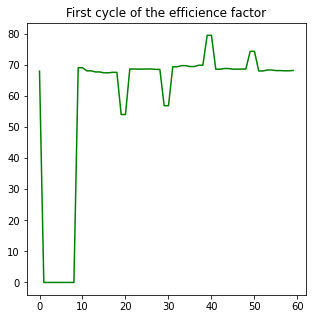

In [92]:
#Plotting the first feature (first cycle)
SE.iloc[0].plot(kind = "line", color = "green", title = "First cycle of the efficience factor", figsize = (5,5))

In [0]:
#Storing the feature
X_flag = SE

In [0]:
#Doing the preprocessing steps
X_train_processed_flag, X_test_processed_flag, y_train_processed_flag, y_test_processed_flag = do_preprocessing(X = X_flag, y = y_flag, features = 1, timesteps= 60)

#4.2 Modeling: Convolutional Neural Networks (CNN)

In [0]:
#Calling a CNN
model_flag = neural_network(input_shape = (60,1), class_numbers = (2))

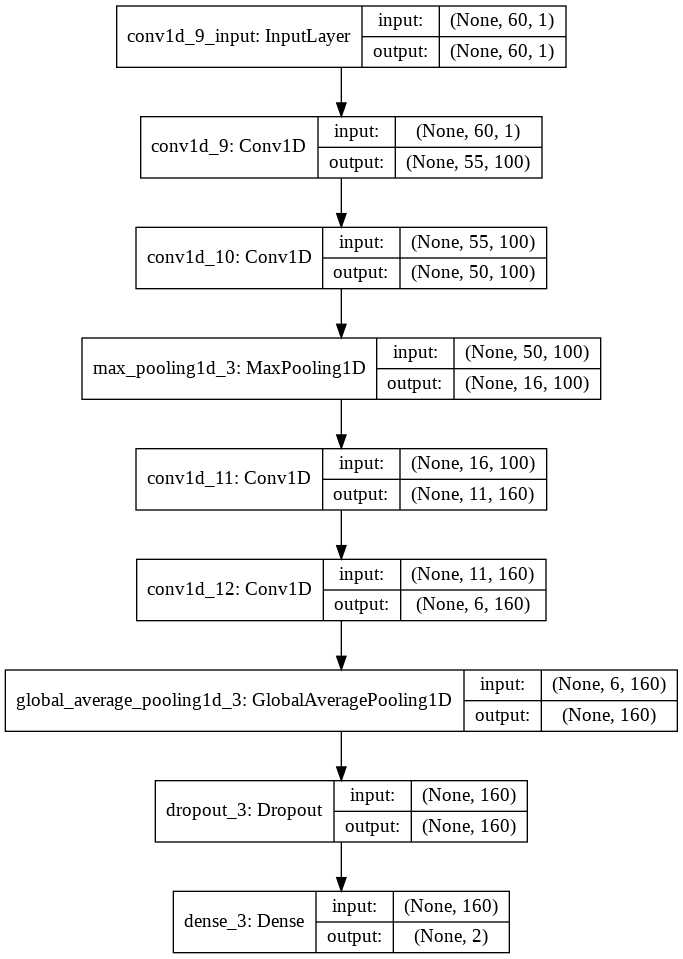

In [96]:
#Plotting the CNN
plot_neural_network(conv_net = model_flag, name="model_flag.png")

In [97]:
#Processing the CNN
loss_test_flag, loss_train_flag, accuracy_test_flag, accuracy_train_flag = processing_neural_network(conv_net = model_flag, X_train = X_train_processed_flag, y_train = y_train_processed_flag)

Train on 1411 samples, validate on 353 samples
Epoch 1/10
1411/1411 [==============================] - 0s 331us/step - loss: 0.6036 - accuracy: 0.6598 - val_loss: 0.5290 - val_accuracy: 0.6289
Epoch 2/10
1411/1411 [==============================] - 0s 169us/step - loss: 0.4334 - accuracy: 0.7973 - val_loss: 0.4221 - val_accuracy: 0.7054
Epoch 3/10
1411/1411 [==============================] - 0s 186us/step - loss: 0.3759 - accuracy: 0.8412 - val_loss: 0.3646 - val_accuracy: 0.8272
Epoch 4/10
1411/1411 [==============================] - 0s 167us/step - loss: 0.3331 - accuracy: 0.8604 - val_loss: 0.3750 - val_accuracy: 0.8272
Epoch 5/10
1411/1411 [==============================] - 0s 168us/step - loss: 0.3473 - accuracy: 0.8583 - val_loss: 0.3507 - val_accuracy: 0.8527
Epoch 6/10
1411/1411 [==============================] - 0s 179us/step - loss: 0.3140 - accuracy: 0.8710 - val_loss: 0.2951 - val_accuracy: 0.8839
Epoch 7/10
1411/1411 [==============================] - 0s 175us/step - loss:

In [98]:
#Showing the parameters computed
model_flag.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 55, 100)           700       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 50, 100)           60100     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 16, 100)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 11, 160)           96160     
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 6, 160)            153760    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 160)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 160)              

#4.3 Results

In [99]:
#Get the accuracy scores
score_flag = model_flag.evaluate(X_test_processed_flag, y_test_processed_flag)
print("\n")
print("The scores are: ")
print(score_flag)
print("\n")

#Get the name of the metrics
names_flag = model_flag.metrics_names
print("The name of the previous scores are: ")
print(names_flag)
print("\n")

#Get the predictions
predictions_flag = model_flag.predict_classes(X_test_processed_flag)
print("The predictions of the model are: ")
print(predictions_flag)

441/441 [==============================] - 0s 76us/step


The scores are: 
[0.36349554045670696, 0.8435373902320862]


The name of the previous scores are: 
['loss', 'accuracy']


The predictions of the model are: 
[0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1
 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1
 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 

In [100]:
#Get the shape
print("The shape of the target flag is: ",y_test_processed_flag.shape)
print("The shape of the predictions given for the model is: ",predictions_flag.shape)

The shape of the target flag is:  (441, 2)
The shape of the predictions given for the model is:  (441,)


In [0]:
#Preprocessing trick with numpy
y_test_processed_flag_back = y_test_processed_flag.argmax(axis=-1)

In [102]:
#Showing the classification report
classification_flag = classification_report(y_test_processed_flag_back, predictions_flag)
print(classification_flag)

              precision    recall  f1-score   support

           0       0.95      0.81      0.88       299
           1       0.70      0.92      0.79       142

    accuracy                           0.84       441
   macro avg       0.82      0.86      0.83       441
weighted avg       0.87      0.84      0.85       441



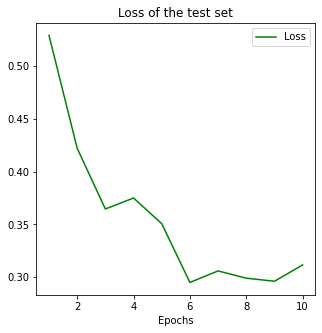

In [103]:
#Plotting the loss curve of the test set
plot_loss_curve(loss = loss_test_flag, epochs = get_epochs(10), color = "green", title = "Loss of the test set")

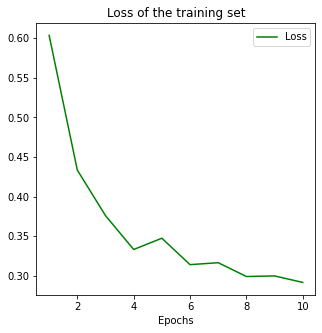

In [104]:
#Plotting the loss curve of the training set
plot_loss_curve(loss = loss_train_flag, epochs = get_epochs(10), color = "green", title = "Loss of the training set")

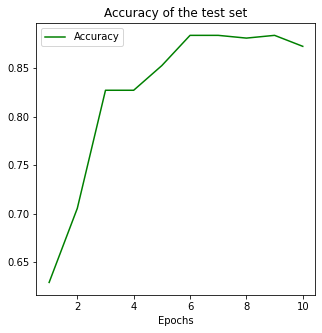

In [105]:
#Plotting the accuracy curve of the test set
plot_accuracy_curve (accuracy = accuracy_test_flag, epochs = get_epochs(10), color = "green", title = "Accuracy of the test set")

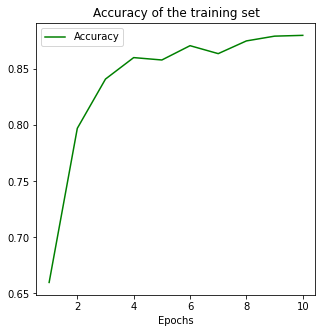

In [106]:
#Plotting the accuracy curve of the training set
plot_accuracy_curve (accuracy = accuracy_train_flag, epochs = get_epochs(10), color = "green", title = "Accuracy of the training set")